In [6]:
import os
import sys
sys.path.append(os.getcwd())

In [7]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from utils.preprocessing import SimplePreprocessor
from utils.datasets import SimpleDatasetLoader
from imutils import paths

In [8]:
dataset = '../Deep-Learning-for-Computer-Vision/datasets/animals'

In [10]:
imagePaths = list(paths.list_images(dataset))
imagePaths

['../Deep-Learning-for-Computer-Vision/datasets/animals/cats/cats_00421.jpg',
 '../Deep-Learning-for-Computer-Vision/datasets/animals/cats/cats_00243.jpg',
 '../Deep-Learning-for-Computer-Vision/datasets/animals/cats/cats_00308.jpg',
 '../Deep-Learning-for-Computer-Vision/datasets/animals/cats/cats_00013.jpg',
 '../Deep-Learning-for-Computer-Vision/datasets/animals/cats/cats_00922.jpg',
 '../Deep-Learning-for-Computer-Vision/datasets/animals/cats/cats_00564.jpg',
 '../Deep-Learning-for-Computer-Vision/datasets/animals/cats/cats_00382.jpg',
 '../Deep-Learning-for-Computer-Vision/datasets/animals/cats/cats_00535.jpg',
 '../Deep-Learning-for-Computer-Vision/datasets/animals/cats/cats_00155.jpg',
 '../Deep-Learning-for-Computer-Vision/datasets/animals/cats/cats_00272.jpg',
 '../Deep-Learning-for-Computer-Vision/datasets/animals/cats/cats_00724.jpg',
 '../Deep-Learning-for-Computer-Vision/datasets/animals/cats/cats_00821.jpg',
 '../Deep-Learning-for-Computer-Vision/datasets/animals/cats/cat

In [50]:
sp = SimplePreprocessor(100,100)
sdl = SimpleDatasetLoader(preprocessors=[sp])
(data, labels) = sdl.load(imagePaths, verbose=500)

[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000


In [51]:
data = data.reshape((data.shape[0],30000))

In [52]:
labels

array(['cats', 'cats', 'cats', ..., 'dogs', 'dogs', 'dogs'], dtype='<U5')

In [53]:
le = LabelEncoder()
labels = le.fit_transform(labels)
labels

array([0, 0, 0, ..., 1, 1, 1])

In [43]:
(trainX, testX, trainY,testY) = train_test_split(data, labels, test_size=0.25, random_state=5) 

In [98]:
model_out = None
r= 'l1'
print(f"[INFO] training model with {r} penalty")
model = SGDClassifier(loss='log_loss', penalty=r, max_iter=10, learning_rate='constant',eta0=0.01, random_state=42)
model.fit(trainX,trainY)
acc = model.score(testX,testY)
print(f"[INFO] {r} penalty accuracy : {acc*100:0.2f}")
model_out = model

[INFO] training model with l1 penalty
[INFO] l1 penalty accuracy : 53.07


/home/shervin/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [99]:
output = model_out.predict(testX)

In [100]:
img = testX[0]

In [101]:
img = img.reshape(100,100,3)

In [77]:
import matplotlib.pyplot as plt

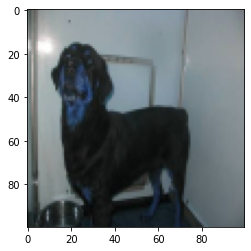

In [58]:
plt.imshow(img)

In [102]:
def decoder(code):
    return 'Cat' if code == 0 else 'Dog' if code == 1 else 'Panda'

def predict(num):
    img = testX[num]
    img = img.reshape(100,100,3)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    plt.show()
    print(decoder(output[num]))
    

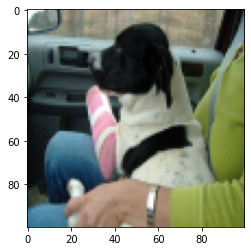

Cat
None


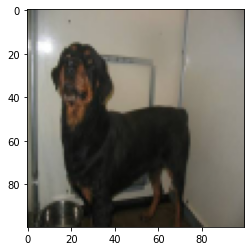

Panda
None


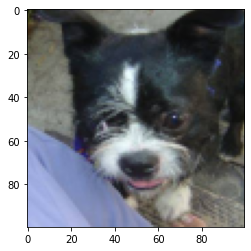

Cat
None


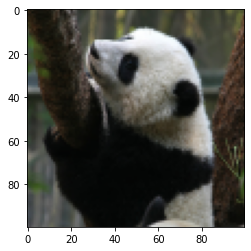

Panda
None


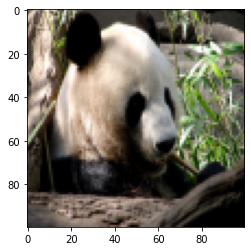

Panda
None


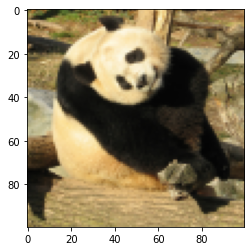

Dog
None


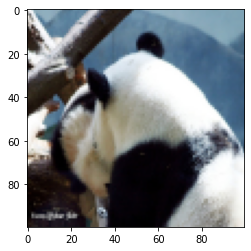

Panda
None


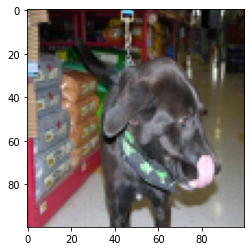

Cat
None


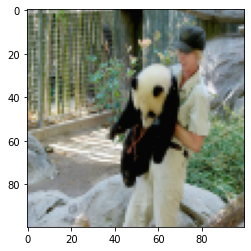

Dog
None


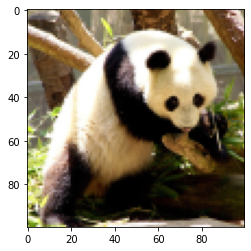

Panda
None


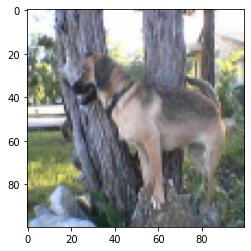

Cat
None


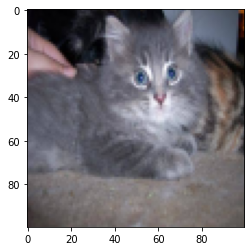

Cat
None


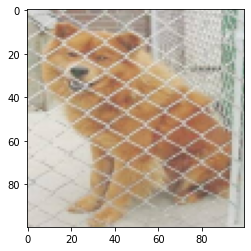

Cat
None


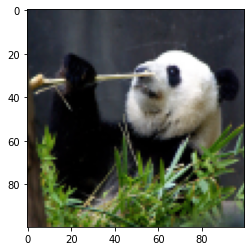

Dog
None


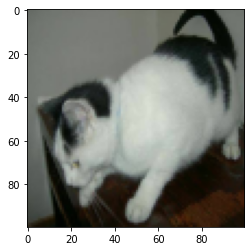

Dog
None


KeyboardInterrupt: 

In [103]:
for i,_ in enumerate(output):
    print(predict(i))

In [94]:
cv2

<module 'cv2' from '/home/shervin/.local/lib/python3.8/site-packages/cv2/__init__.py'>